In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder


In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [6]:
df.shape

(1338, 7)

In [7]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [8]:
df.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [9]:
#checking columns name
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
#checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 Obs: There are no null values in the dataset. The datatype for 2 columns is float,1 column is integer and 3 columns are objest datatype. Since we have to predict insurance cost, charges will be out target varaible with datatype as float.
 Also the total number of rows in this dataset is 1338

<Axes: >

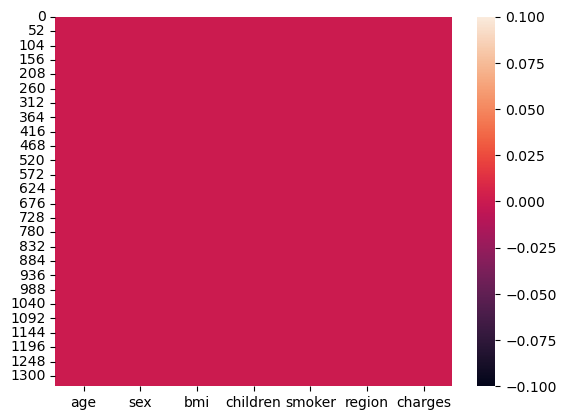

In [14]:
#heatmap to confirm null values
sns.heatmap(df.isnull())

Here we can see clearly that there are no null values in the dataset

In [15]:
df.nunique().to_frame()

0
age         47
sex          2
bmi        548
children     6
smoker       2
region       4
charges   1337

Obs: Above we can see the number of unique values in each column. As we can see sex column has 2 unique values, smoker column has 2 unique values, region has 4 , children has 6 unique values. In charges column out of 1338 we have 1337 unique values which means charges column has different value in each row and it is numerical data hence this will be a regression problem.

In [16]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Obs: Above we can see that the mean in all the columns is slightly greater than median which indicates that the data is right skewed. 
    2.) In bmi column there is high difference between 75th percentile and max value which indicates the presence of outliers. Charges column also there is large differnece between 75th percentile and max value. We will further test this.

In [17]:
#checking the value count in each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

Obj: Above we can see the value count in each column for each unque values.

In [18]:
#Separating numerical and catagorical columns:
#Checking for catagorical column:
categorical=[]
numerical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical.append(i)
    else:
        numerical.append(i)
print("Categorical Columns :",categorical)
print("Numerical Columns :",numerical)
        

Categorical Columns : ['sex', 'smoker', 'region']
Numerical Columns : ['age', 'bmi', 'children', 'charges']


DATA VISUALIZATION

male      676
female    662
Name: sex, dtype: int64


<Axes: xlabel='sex', ylabel='count'>

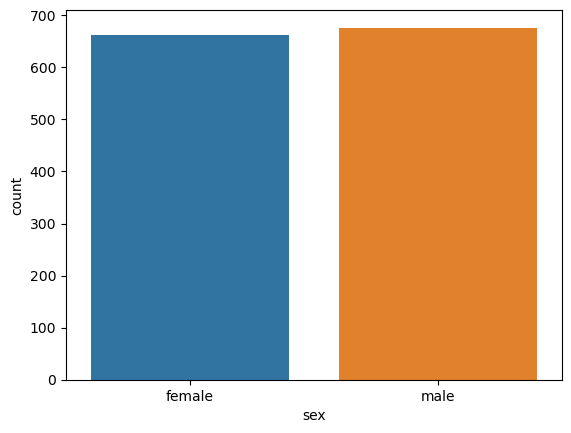

In [19]:
print(df['sex'].value_counts())
sns.countplot(x='sex',data=df)

Above we can see the graphical representation of teh no. of male and female present in the dataframe. There count is almost same

no     1064
yes     274
Name: smoker, dtype: int64


<Axes: xlabel='smoker', ylabel='count'>

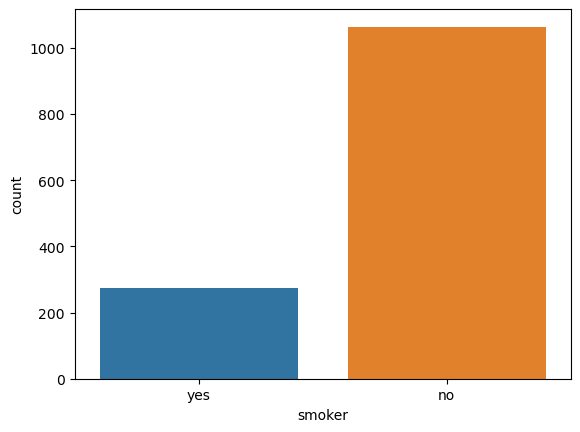

In [20]:
print(df['smoker'].value_counts())
sns.countplot(x="smoker",data=df)

Above we can see the value count of smokers and non smokers present in the dataframe. We can see that number of smokers is very less from number of people who do not smoke.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<Axes: xlabel='region', ylabel='count'>

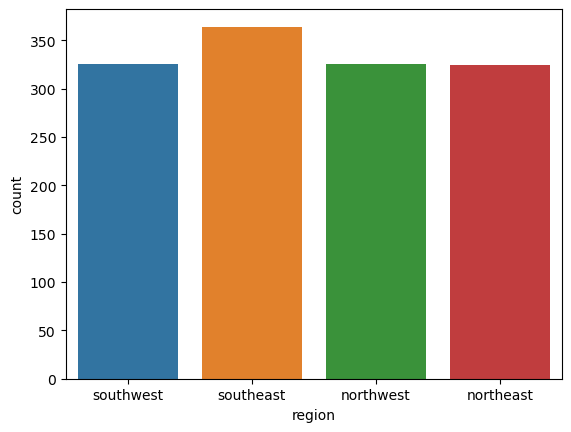

In [21]:
print(df['region'].value_counts())
sns.countplot(x='region',data=df)

Above we can see the value count in dataset region wise. As we can see there are almost same number of people in dataset from each region. Only southeast has a little higher number

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


<Axes: xlabel='children', ylabel='count'>

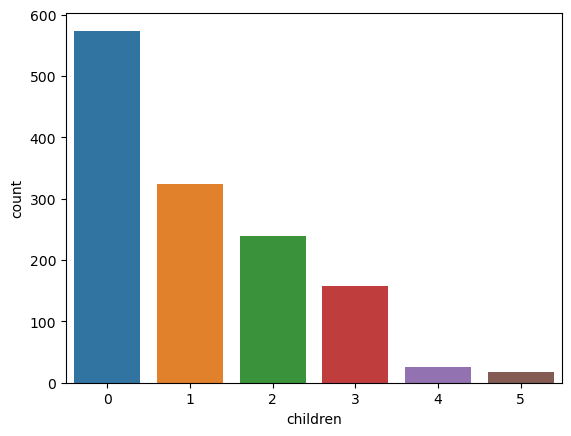

In [22]:
print(df['children'].value_counts())
sns.countplot(x="children",data=df)

Above graph shows the number of number of children people have in the dataset. Majority of the people have no children

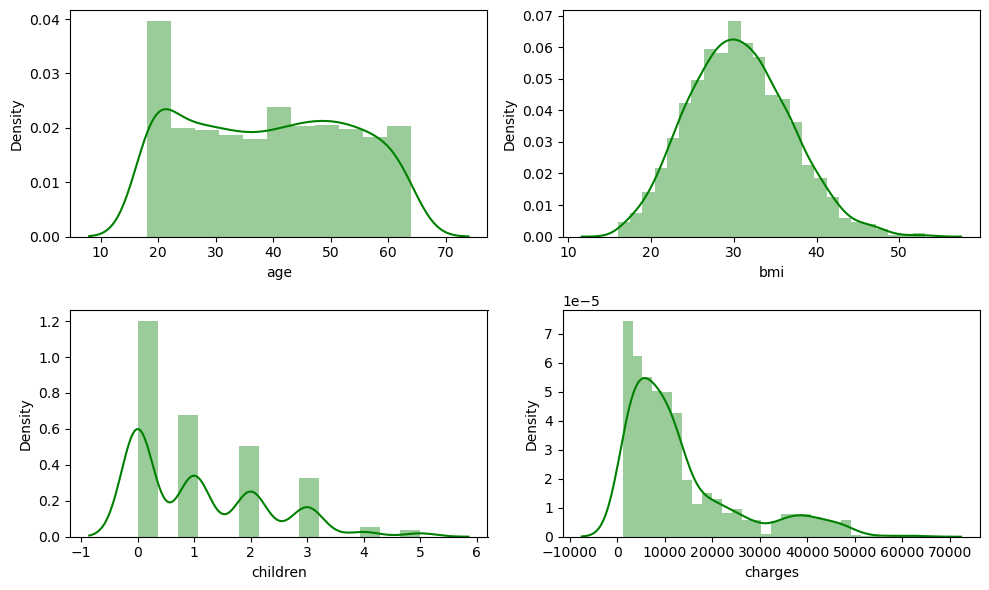

In [23]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color='g')
    plotnumber+=1
plt.tight_layout()    

Here we can see that the age column is normally distributed while children, bmi and charges column have a slight positive skewwness

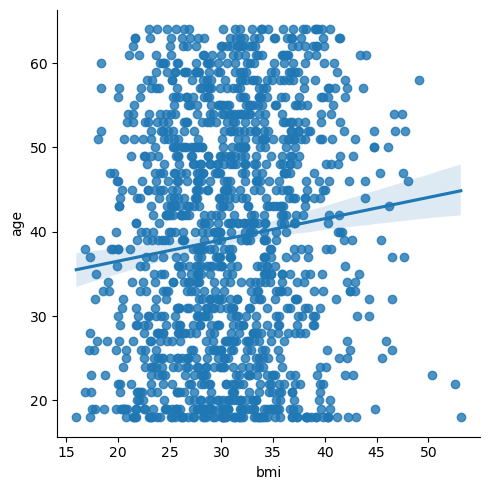

In [24]:
sns.lmplot(x='bmi',y='age',data=df)

Here we can see that there is not much positive corelation between age and bmi

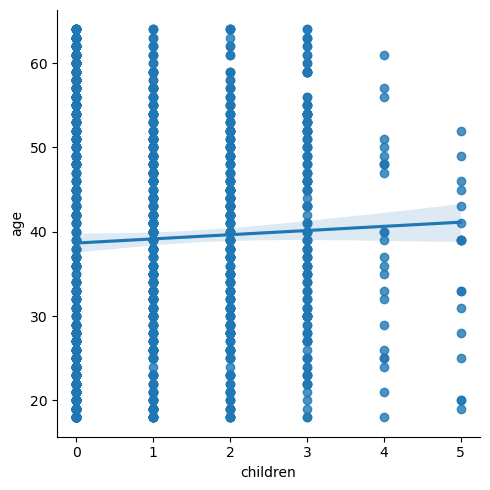

In [25]:
sns.lmplot(x='children',y='age', data=df)

Here we can see that there is not much corelation ship between age and no of children

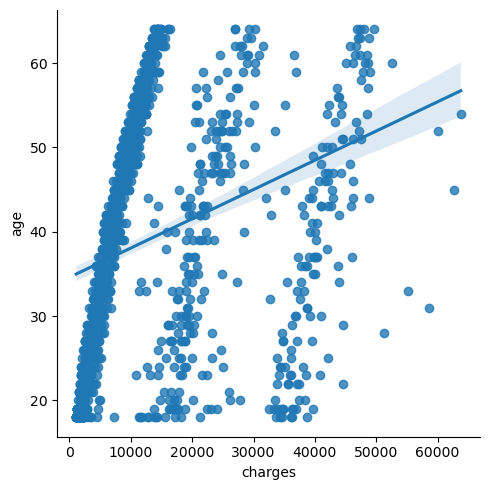

In [26]:
sns.lmplot(x='charges',y='age',data=df)

Here we can see that there is a positive correlation between charges and age.

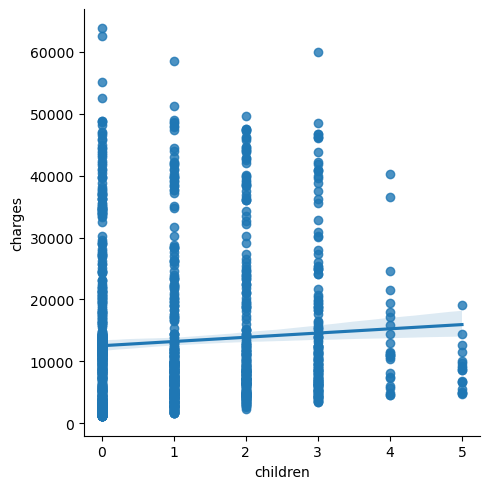

In [27]:
sns.lmplot(x='children',y='charges',data=df)

Here we can see negative correlation between number of kids and charges

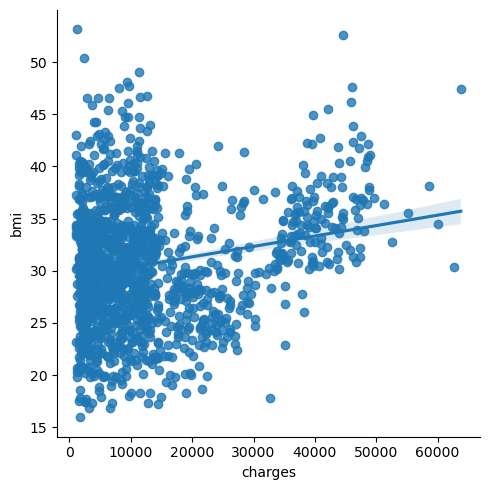

In [28]:
sns.lmplot(x='charges',y='bmi',data=df)

Here we can see that there is very little positive correlation of charges with bmi

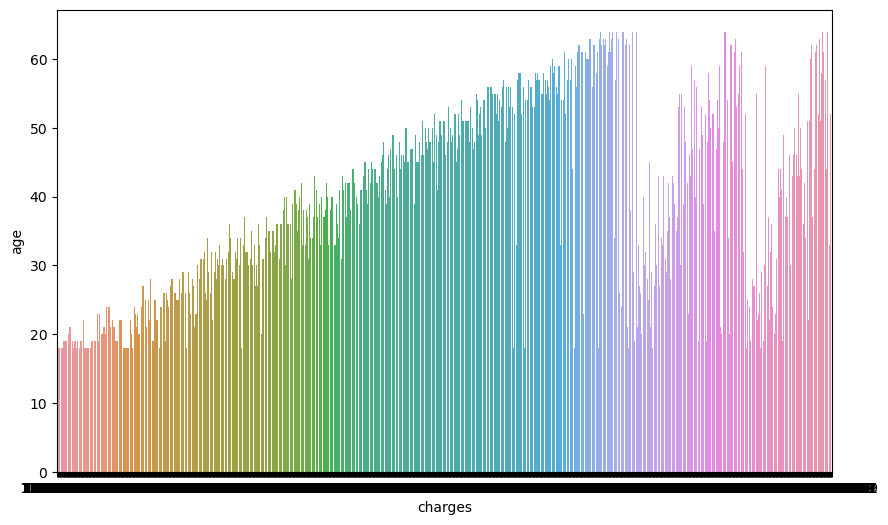

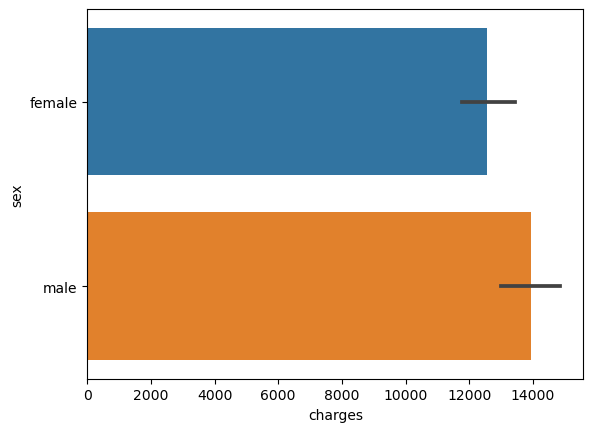

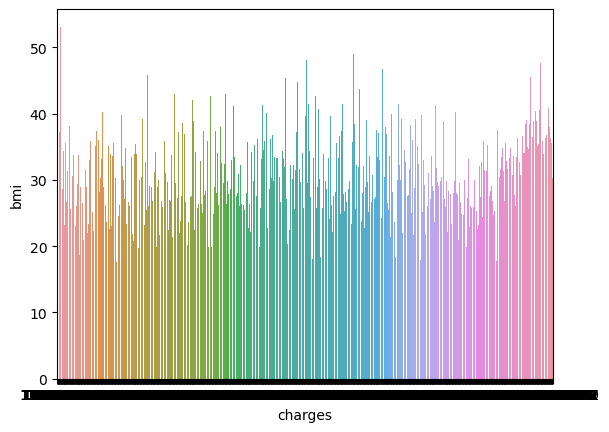

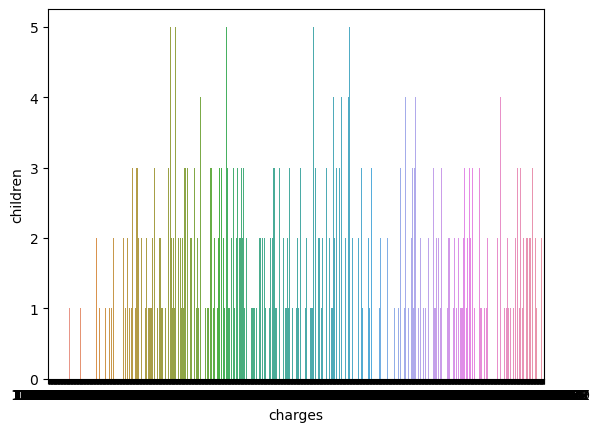

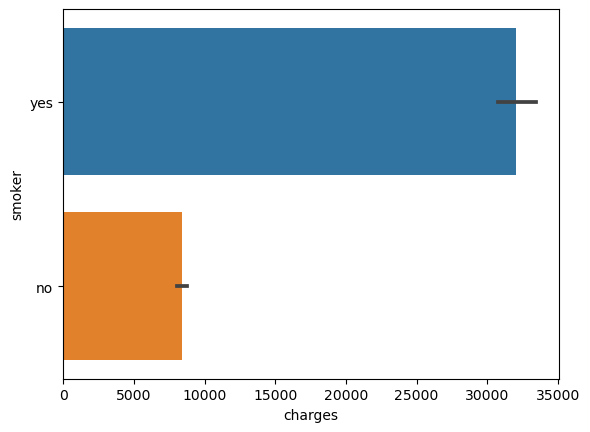

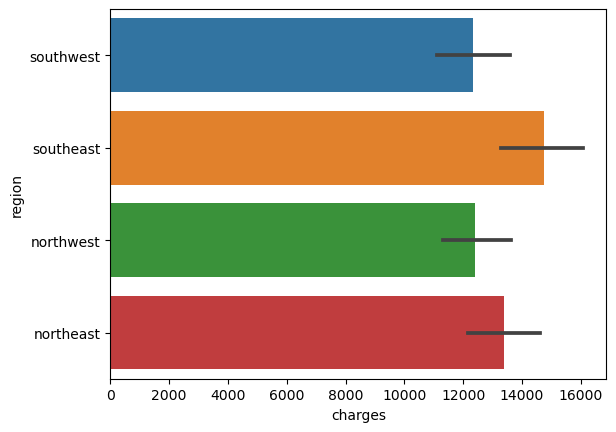

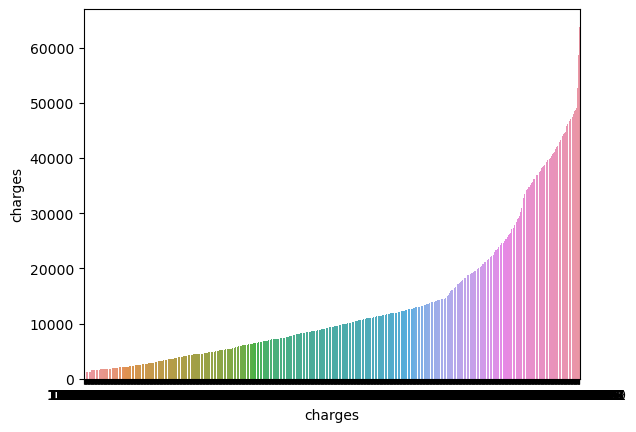

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(10,6))
z=1
for i in df:
    if z<=7:
        sns.barplot(x='charges',y=i,data=df)
        plt.show()
        z+=1
plt.tight_layout()

Here we can see teh relationship between charges and rest of the columns.Charges is positively correlated with age.Sex column does not have mush impact on the charges. bmi and charges have not much relation
Having more children again decreases charges. Smokers have more charges that non smokers

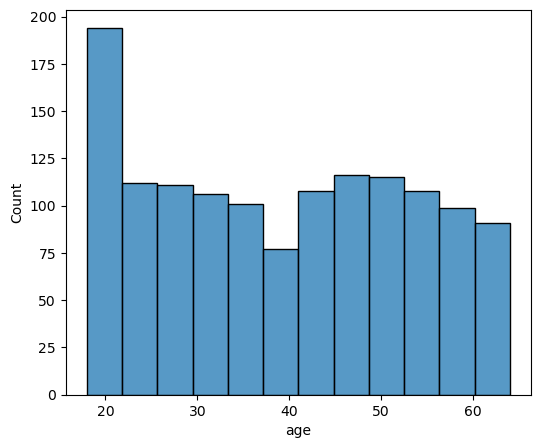

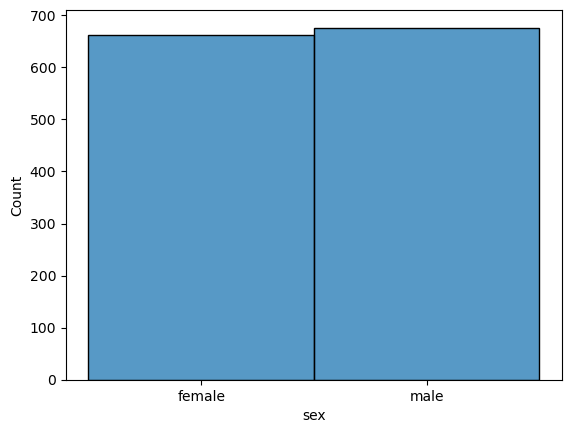

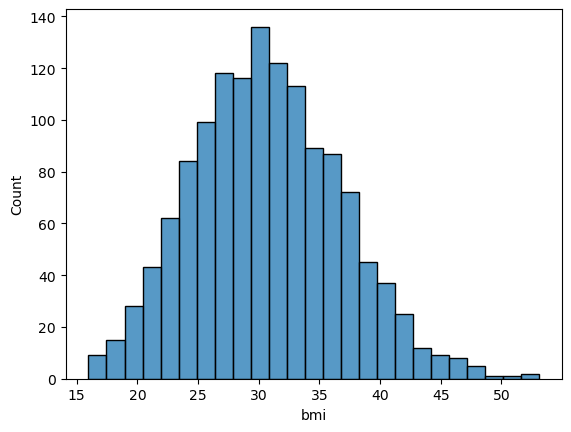

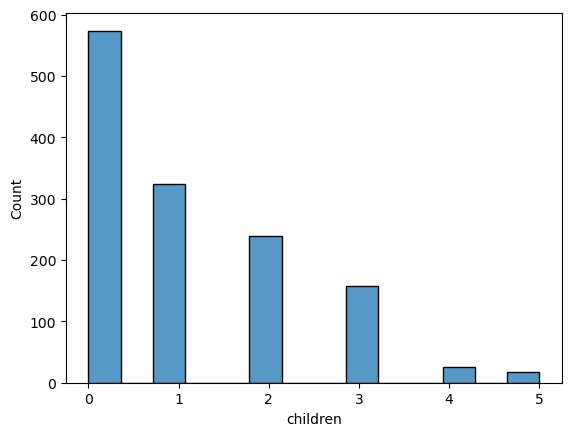

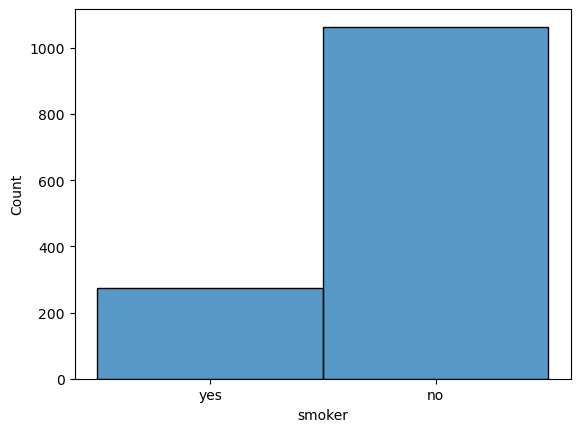

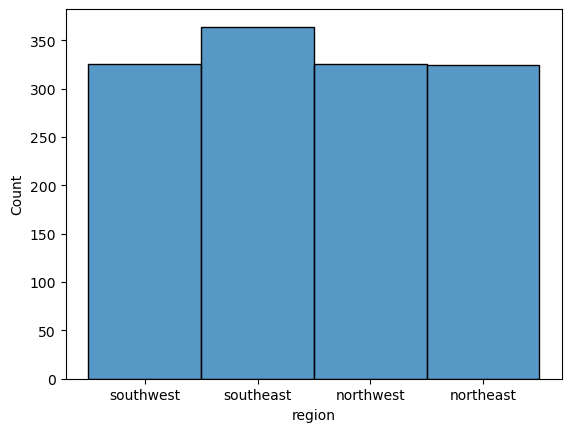

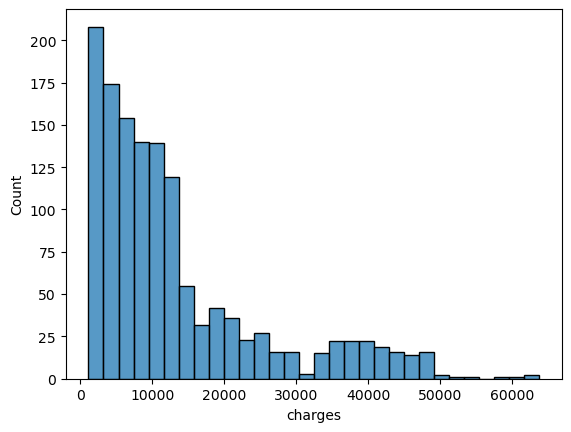

In [31]:
plt.figure(figsize=(6,5))
z=1
for i in df:
    if z<=7:
        sns.histplot(x=i,data=df)
        plt.show()
        z+=1

Above histogram shows the frequency of data in the dataset. Age has highest frequecy at around 20 yrs . Sex column has almost same frquency of male and female. bmi data has highest frequecy around 35 and graph shows normal distribution. smoker has more frequency in non smoker column. area has almost same frequency is all the areas. charges have higer frequency between 5000-15000$

<Axes: xlabel='age', ylabel='bmi'>

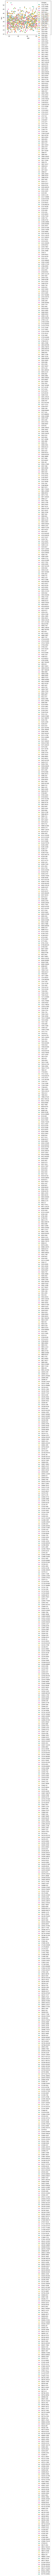

In [32]:
sns.scatterplot(x='age',y='bmi',hue='charges',data=df,palette='Dark2')

As we can see above that there is not much relationship between age and bmi

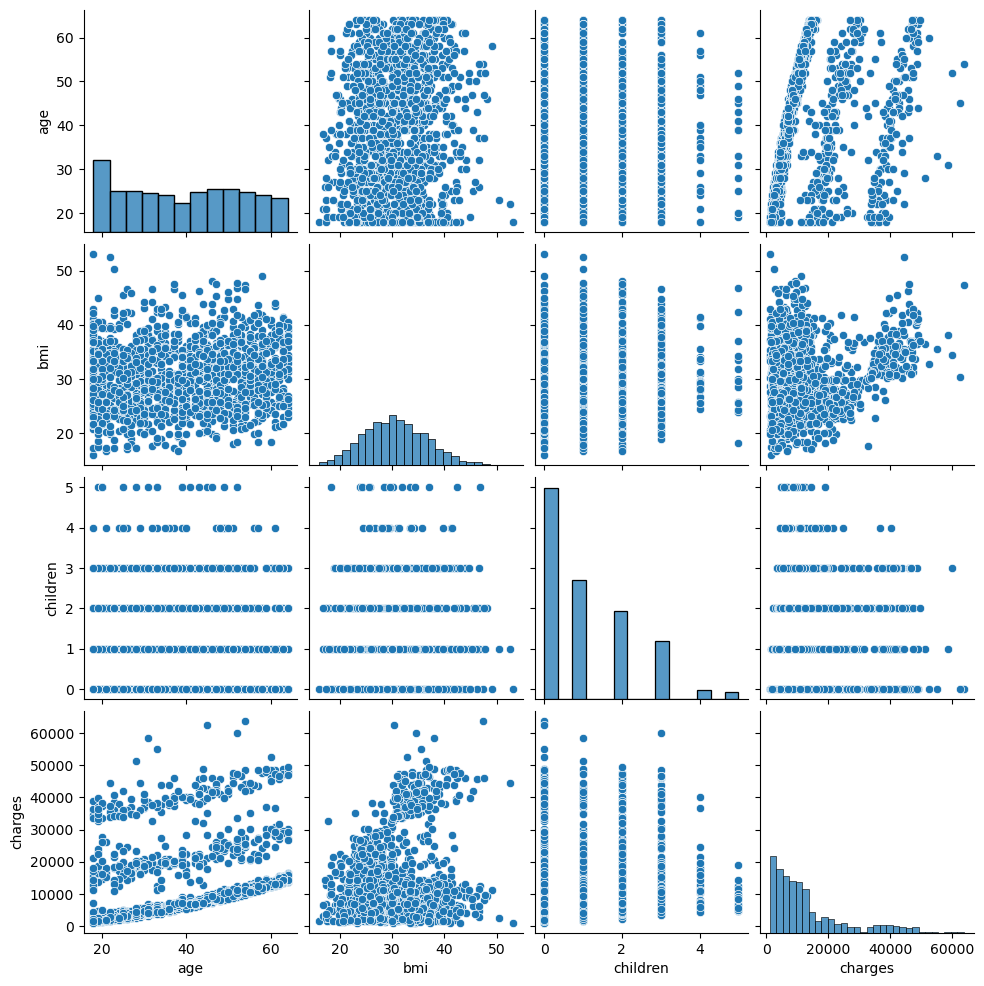

In [39]:
sns.pairplot(data=df)

As we can see above that children is negatively correlated to charges. with increase in age increases the charges bmi does not have much impact on charges 

age            Axes(0.125,0.53;0.352273x0.35)
bmi         Axes(0.547727,0.53;0.352273x0.35)
children       Axes(0.125,0.11;0.352273x0.35)
charges     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

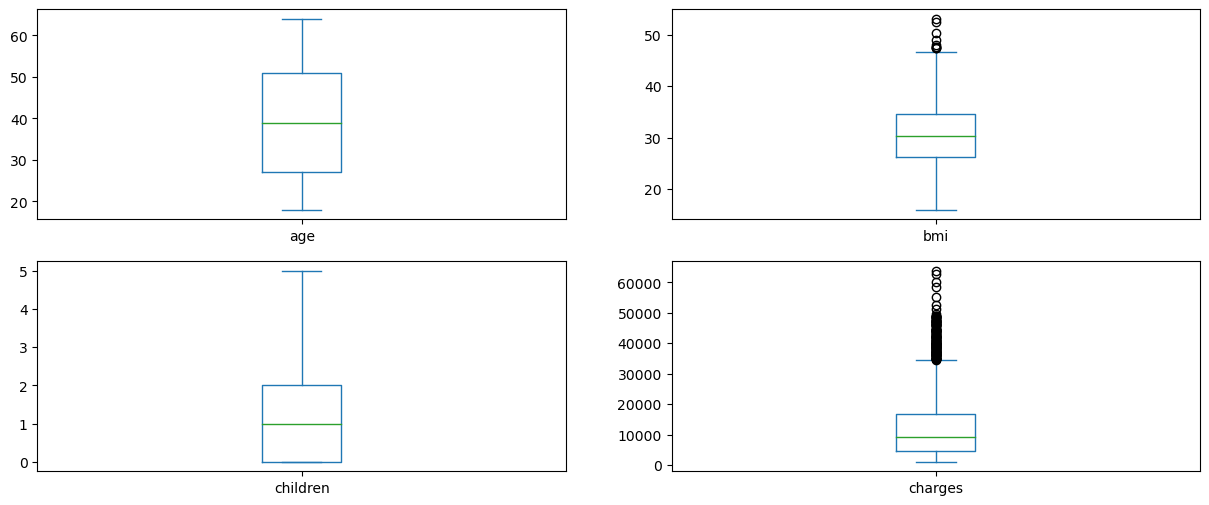

In [33]:
# box plot
df.plot(kind='box',subplots=True,layout=(2,2),figsize=(15,6))

In [ ]:
Here we can clearly see that there are no outliers present in age and children column but there are outliers present in charges and bmi but since charges is target variable we will not be removing outliers from charges

In [37]:
#removing outliers from bmi
z=np.abs(zscore(df[['age','bmi','children']]))
z

age       bmi  children
0     1.438764  0.453320  0.908614
1     1.509965  0.509621  0.078767
2     0.797954  0.383307  1.580926
3     0.441948  1.305531  0.908614
4     0.513149  0.292556  0.908614
...        ...       ...       ...
1333  0.768473  0.050297  1.580926
1334  1.509965  0.206139  0.908614
1335  1.509965  1.014878  0.908614
1336  1.296362  0.797813  0.908614
1337  1.551686  0.261388  0.908614

[1338 rows x 3 columns]

In [38]:
np.where(z>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
         932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
       dtype=int64),
 array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1],
       dtype=int64))

In [43]:
df1=df[(z<3).all(axis=1)]
df1

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1316 rows x 7 columns]

In [44]:
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [46]:
print("Data_Loss= ",((df.shape[0]-df1.shape[0])/df.shape[0]))

Data_Loss=  0.016442451420029897


Since the data loss is small and there are a very few outliers, i will test both till i get better accuracy 
df is dataset with outliers
df1 is dataset without outliers

Checking for skewness

In [47]:
#Encoding categorical columns df
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df

age  sex     bmi  children  smoker  region      charges
0      19  0.0  27.900         0     1.0     3.0  16884.92400
1      18  1.0  33.770         1     0.0     2.0   1725.55230
2      28  1.0  33.000         3     0.0     2.0   4449.46200
3      33  1.0  22.705         0     0.0     1.0  21984.47061
4      32  1.0  28.880         0     0.0     1.0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50  1.0  30.970         3     0.0     1.0  10600.54830
1334   18  0.0  31.920         0     0.0     0.0   2205.98080
1335   18  0.0  36.850         0     0.0     2.0   1629.83350
1336   21  0.0  25.800         0     0.0     3.0   2007.94500
1337   61  0.0  29.070         0     1.0     1.0  29141.36030

[1338 rows x 7 columns]

In [78]:
#Encoding categorical columns df1
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtype=='object':
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
        
df1

age  sex     bmi  children  smoker  region      charges
0      19  0.0  27.900         0     1.0     3.0  16884.92400
1      18  1.0  33.770         1     0.0     2.0   1725.55230
2      28  1.0  33.000         3     0.0     2.0   4449.46200
3      33  1.0  22.705         0     0.0     1.0  21984.47061
4      32  1.0  28.880         0     0.0     1.0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50  1.0  30.970         3     0.0     1.0  10600.54830
1334   18  0.0  31.920         0     0.0     0.0   2205.98080
1335   18  0.0  36.850         0     0.0     2.0   1629.83350
1336   21  0.0  25.800         0     0.0     3.0   2007.94500
1337   61  0.0  29.070         0     1.0     1.0  29141.36030

[1316 rows x 7 columns]

Now the entire column has been encoded in numerical values. We can check the same below

In [48]:
df.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
charges     float64
dtype: object

Here we can see that the datatype of all the columns in now numerical

In [49]:
#Now we will check for skewness df
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [79]:
#Now we will check for skewness df1
df1.skew()

age         0.049904
sex        -0.012172
bmi         0.193564
children    0.740881
smoker      1.450367
region     -0.024107
charges     1.501055
dtype: float64

As we can see a very small skewness is present in smoker and children but since smoker is categorical data we will not remove skewness. We will only remove skewness from children column and charges column

In [50]:
df['children']=np.cbrt(df['children'])

In [80]:
df1['children']=np.cbrt(df1['children'])

In [60]:
df['charges']=np.cbrt(df['charges'])

In [81]:
df1['charges']=np.cbrt(df1['charges'])

In [61]:
#rechecking skewness df
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children   -0.097116
smoker      1.464766
region     -0.038101
charges     0.515183
dtype: float64

In [82]:
# rechecking skewness df1
df1.skew()

age         0.049904
sex        -0.012172
bmi         0.193564
children   -0.098422
smoker      1.450367
region     -0.024107
charges     0.507049
dtype: float64

Here we can see that we have reduced the skewness from children column. Let us check the same by distribution plot

<Axes: xlabel='children', ylabel='Density'>

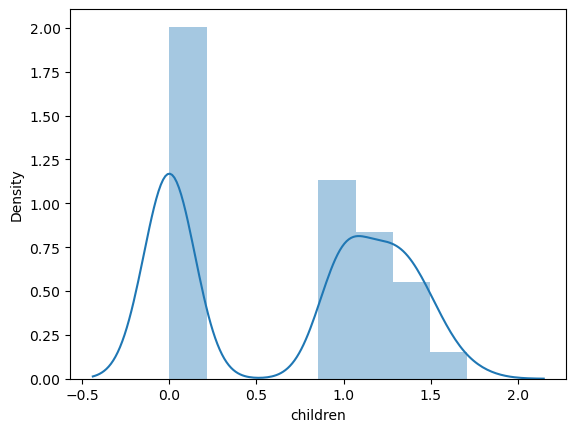

In [52]:
#df
sns.distplot(df['children'])

<Axes: xlabel='charges', ylabel='Density'>

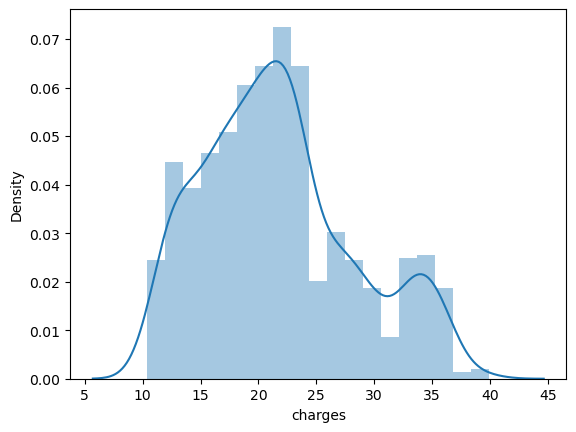

In [62]:
sns.distplot(df['charges'])

<Axes: xlabel='children', ylabel='Density'>

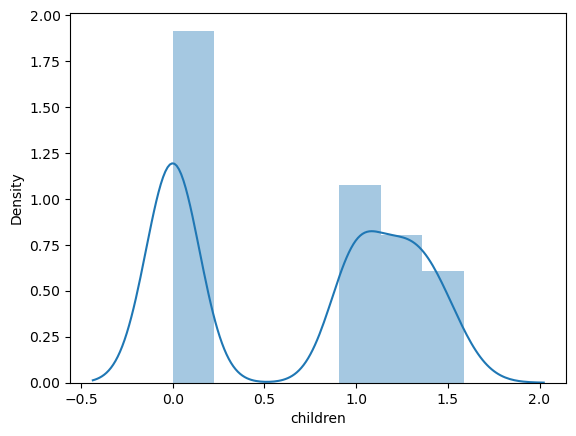

In [92]:
#df1
sns.distplot(df1['children'])

<Axes: xlabel='charges', ylabel='Density'>

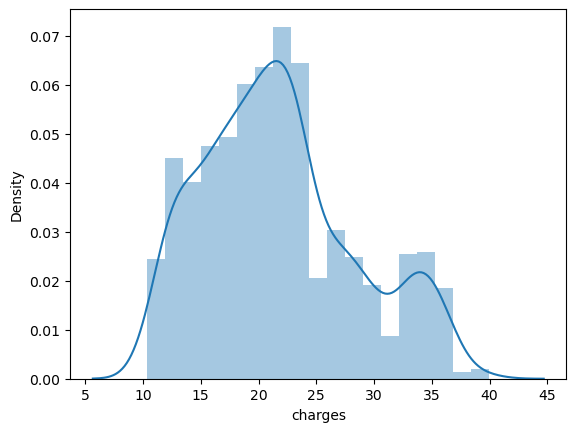

In [93]:
sns.distplot(df1['charges'])

Here we can see that children and charges is almost normally distributed

CORRELATION

In [53]:
#correlation in df
dfcor=df.corr()
dfcor

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.048919 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.016183  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.016515  0.003750  0.157566  0.198341
children  0.048919  0.016183  0.016515  1.000000  0.011829  0.014133  0.072756
smoker   -0.025019  0.076185  0.003750  0.011829  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.014133 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.072756  0.787251 -0.006208  1.000000

In [83]:
#correlation in df1
df1cor=df1.corr()
df1cor

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.017673  0.119062  0.056962 -0.025751  0.004741  0.451204
sex      -0.017673  1.000000  0.039934  0.015188  0.079468  0.006155  0.030145
bmi       0.119062  0.039934  1.000000  0.024359  0.004988  0.159535  0.164014
children  0.056962  0.015188  0.024359  1.000000  0.019225  0.003605  0.135231
smoker   -0.025751  0.079468  0.004988  0.019225  1.000000 -0.001462  0.732532
region    0.004741  0.006155  0.159535  0.003605 -0.001462  1.000000 -0.028795
charges   0.451204  0.030145  0.164014  0.135231  0.732532 -0.028795  1.000000

<Axes: >

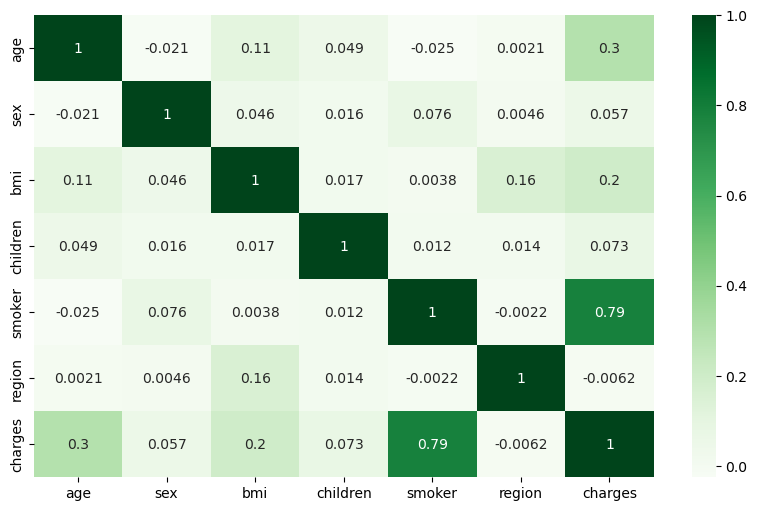

In [54]:
#heatmap of dfcor
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Greens',annot=True)

<Axes: >

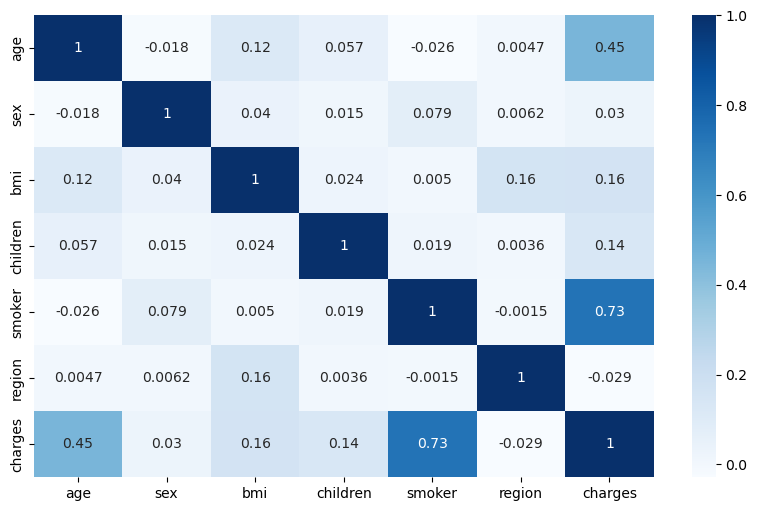

In [84]:
#heatmap for df1cor
plt.figure(figsize=(10,6))
sns.heatmap(df1cor,cmap='Blues',annot=True)

Above we can see that:
    1.) smoker column is highly positively correlated with charges
    2.)age is slightly positively correlated with charges.
    3.) There are no columns that are highly correlated with each other hence the probability of multicolinearity is negligible.
    Still we will check for the same

In [55]:
dfcor['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.072756
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [94]:
df1cor['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.732532
age         0.451204
bmi         0.164014
children    0.135231
sex         0.030145
region     -0.028795
Name: charges, dtype: float64

Here we can observe the positive and negative correlation with target variable charges that we saw in heatmap above.

In [56]:
#Now separating dependent and independent variables
x=df.drop('charges',axis=1)
y=df['charges']

In [85]:
#Now separating dependent and independent variables
x1=df1.drop('charges',axis=1)
y1=df1['charges']

In [64]:
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


In [95]:
print(x1.shape)
print(y1.shape)

(1316, 6)
(1316,)


In [57]:
#now we will scale x
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

age       sex       bmi  children    smoker    region
0    -1.438764 -1.010519 -0.453320 -1.117604  1.970587  1.343905
1    -1.509965  0.989591  0.509621  0.502009 -0.507463  0.438495
2    -0.797954  0.989591  0.383307  1.218282 -0.507463  0.438495
3    -0.441948  0.989591 -1.305531 -1.117604 -0.507463 -0.466915
4    -0.513149  0.989591 -0.292556 -1.117604 -0.507463 -0.466915
...        ...       ...       ...       ...       ...       ...
1333  0.768473  0.989591  0.050297  1.218282 -0.507463 -0.466915
1334 -1.509965 -1.010519  0.206139 -1.117604 -0.507463 -1.372326
1335 -1.509965 -1.010519  1.014878 -1.117604 -0.507463  0.438495
1336 -1.296362 -1.010519 -0.797813 -1.117604 -0.507463  1.343905
1337  1.551686 -1.010519 -0.261388 -1.117604  1.970587 -0.466915

[1338 rows x 6 columns]

In [86]:
#now we will scale x1
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

age       sex       bmi  children    smoker    region
0    -1.441444 -1.006098 -0.453768 -1.108972  1.959141  1.352089
1    -1.512509  0.993939  0.527239  0.529892 -0.510428  0.446568
2    -0.801858  0.993939  0.398555  1.254679 -0.510428  0.446568
3    -0.446533  0.993939 -1.321967 -1.108972 -0.510428 -0.458954
4    -0.517598  0.993939 -0.289988 -1.108972 -0.510428 -0.458954
...        ...       ...       ...       ...       ...       ...
1311  0.761574  0.993939  0.059297  1.254679 -0.510428 -0.458954
1312 -1.512509 -1.006098  0.218063 -1.108972 -0.510428 -1.364475
1313 -1.512509 -1.006098  1.041975 -1.108972 -0.510428  0.446568
1314 -1.299314 -1.006098 -0.804724 -1.108972 -0.510428  1.352089
1315  1.543290 -1.006098 -0.258235 -1.108972  1.959141 -0.458954

[1316 rows x 6 columns]

In [58]:
#Checking VIF for x
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features  VIF Values
0       age    1.015956
1       sex    1.008844
2       bmi    1.040656
3  children    1.003101
4    smoker    1.006551
5    region    1.025881

In [87]:
#Checking VIF for x1
vif=pd.DataFrame()
vif["Features"]=x1.columns
vif["VIF Values"]=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

Features  VIF Values
0       age    1.018855
1       sex    1.008563
2       bmi    1.043215
3  children    1.004191
4    smoker    1.007367
5    region    1.026341

Since vif of all columns is equal i am deciding not to drop any column

MODEL BUILDING

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [73]:
x=df.drop("charges",axis=1)

y=df["charges"]

In [147]:
x1=df1.drop("charges",axis=1)

y1=df1["charges"]

In [91]:
#Now we find the best random state with x and y
maxRS=0
maxaccu=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Maximum r2 score is ",maxaccu, "at random state ",maxRS)
    
    


Maximum r2 score is  0.8273389787575156 at random state  112


In [148]:
#Now we find the best random state with x1 and y1
maxRS1=0
maxaccu1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x1_train,y1_train)
    pred=lr.predict(x1_test)
    acc=r2_score(y1_test,pred)
    if acc>maxaccu1:
        maxaccu1=acc
        maxRS1=i
print("Maximum r2 score is ",maxaccu1, "at random state ",maxRS1)

Maximum r2 score is  0.8304548800535044 at random state  38


In [ ]:
# since we are getting better accuracy with df1 we will proceed ahead with model building with df1


In [149]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [150]:
LR=LinearRegression()
LR.fit(x1_train,y1_train)
pred_LR=LR.predict(x1_test)
pred_train=LR.predict(x1_train)
print(LR)
print("R2_Score : ",r2_score(y1_test,pred_LR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_LR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_LR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_LR)) )


LinearRegression()
R2_Score :  0.7828221510339628
R2_Score on Training Data : 0.7784987026940098
Mean Absolute Error: 2.095240864444686
Mean Squared Error: 9.789398222227032
Root Mean Squared Error: 3.1288014034494154


In [151]:
RFR=RandomForestRegressor()
RFR.fit(x1_train,y1_train)
pred_RFR=RFR.predict(x1_test)
pred_train=RFR.predict(x1_train)
print(RFR)
print("R2_Score : ",r2_score(y1_test,pred_RFR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_RFR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_RFR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_RFR)) )


RandomForestRegressor()
R2_Score :  0.8148677299157644
R2_Score on Training Data : 0.9728497636483759
Mean Absolute Error: 1.5848975842957287
Mean Squared Error: 8.344928012998635
Root Mean Squared Error: 2.8887589053084084


In [152]:
KNR=KNeighborsRegressor()
KNR.fit(x1_train,y1_train)
pred_KNR=KNR.predict(x1_test)
pred_train=KNR.predict(x1_train)
print(KNR)
print("R2_Score : ",r2_score(y1_test,pred_KNR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_KNR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_KNR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_KNR)) )


KNeighborsRegressor()
R2_Score :  0.23084963114757207
R2_Score on Training Data : 0.47268783457419505
Mean Absolute Error: 4.372750858888548
Mean Squared Error: 34.66983069091317
Root Mean Squared Error: 5.888109262820551


In [153]:
GBR=GradientBoostingRegressor()
GBR.fit(x1_train,y1_train)
pred_GBR=GBR.predict(x1_test)
pred_train=GBR.predict(x1_train)
print(GBR)
print("R2_Score : ",r2_score(y1_test,pred_GBR))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_GBR))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_GBR))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_GBR)) )

GradientBoostingRegressor()
R2_Score :  0.8393653164888245
R2_Score on Training Data : 0.8945545295850078
Mean Absolute Error: 1.5163406001919266
Mean Squared Error: 7.240687264741338
Root Mean Squared Error: 2.690852516348924


In [154]:
svr=SVR()
svr.fit(x1_train,y1_train)
pred_svr=svr.predict(x1_test)
pred_train=svr.predict(x1_train)
print(svr)
print("R2_Score : ",r2_score(y1_test,pred_svr))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_svr))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_svr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_svr)) )

SVR()
R2_Score :  -0.04001867484032551
R2_Score on Training Data : 0.0019301528013430103
Mean Absolute Error: 3.9647594163903954
Mean Squared Error: 46.87935263672747
Root Mean Squared Error: 6.846849833078528


In [155]:
lasso=Lasso()
lasso.fit(x1_train,y1_train)
pred_lasso=lasso.predict(x1_test)
pred_train=lasso.predict(x1_train)
print(lasso)
print("R2_Score : ",r2_score(y1_test,pred_lasso))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_lasso))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_lasso))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_lasso)) )


Lasso()
R2_Score :  0.6335984189080375
R2_Score on Training Data : 0.6188845061710835
Mean Absolute Error: 3.0563856864231362
Mean Squared Error: 16.515731248096817
Root Mean Squared Error: 4.063955123779889


In [156]:
ridge=Ridge()
ridge.fit(x1_train,y1_train)
pred_ridge=ridge.predict(x1_test)
pred_train=ridge.predict(x1_train)
print(ridge)
print("R2_Score : ",r2_score(y1_test,pred_ridge))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_ridge))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_ridge))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_ridge)) )


Ridge()
R2_Score :  0.7829771688373603
R2_Score on Training Data : 0.7784729366155351
Mean Absolute Error: 2.0991513661225216
Mean Squared Error: 9.782410718592486
Root Mean Squared Error: 3.1276845618752036


In [157]:
EN=ElasticNet()
EN.fit(x1_train,y1_train)
pred_EN=EN.predict(x1_test)
pred_train=EN.predict(x1_train)
print(EN)
print("R2_Score : ",r2_score(y1_test,pred_EN))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_EN))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_EN))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_EN)) )


ElasticNet()
R2_Score :  0.39821783901659613
R2_Score on Training Data : 0.39401620586377484
Mean Absolute Error: 4.178359875972724
Mean Squared Error: 27.125626508162615
Root Mean Squared Error: 5.2082268103609515


In [158]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
pred_dtr=dtr.predict(x1_test)
pred_train=dtr.predict(x1_train)
print(dtr)
print("R2_Score : ",r2_score(y1_test,pred_dtr))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_dtr))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_dtr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_dtr)) )


DecisionTreeRegressor()
R2_Score :  0.6406841021847176
R2_Score on Training Data : 1.0
Mean Absolute Error: 1.9445275042233965
Mean Squared Error: 16.19634059383703
Root Mean Squared Error: 4.024467740439353


In [159]:
ad=AdaBoostRegressor()
ad.fit(x1_train,y1_train)
pred_ad=ad.predict(x1_test)
pred_train=ad.predict(x1_train)
print(ad)
print("R2_Score : ",r2_score(y1_test,pred_ad))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_ad))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_ad))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_ad)))

AdaBoostRegressor()
R2_Score :  0.7783011416533703
R2_Score on Training Data : 0.7834215524401474
Mean Absolute Error: 2.4613719312389493
Mean Squared Error: 9.993184940825412
Root Mean Squared Error: 3.16119992104666


In [160]:
br=BaggingRegressor()
br.fit(x1_train,y1_train)
pred_br=br.predict(x1_test)
pred_train=br.predict(x1_train)
print(br)
print("R2_Score : ",r2_score(y1_test,pred_br))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_br))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_br))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_br)))

BaggingRegressor()
R2_Score :  0.8049788271022356
R2_Score on Training Data : 0.9645798319394174
Mean Absolute Error: 1.6359972686278896
Mean Squared Error: 8.790675164853306
Root Mean Squared Error: 2.964907277614817


In [161]:
etr=ExtraTreesRegressor()
etr.fit(x1_train,y1_train)
pred_etr=etr.predict(x1_test)
pred_train=etr.predict(x1_train)
print(etr)
print("R2_Score : ",r2_score(y1_test,pred_etr))
print("R2_Score on Training Data :", r2_score(y1_train,pred_train))
print("Mean Absolute Error:", mean_absolute_error(y1_test,pred_etr))
print("Mean Squared Error:", mean_squared_error(y1_test,pred_etr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,pred_etr)))

ExtraTreesRegressor()
R2_Score :  0.809937876302922
R2_Score on Training Data : 1.0
Mean Absolute Error: 1.5038572564449237
Mean Squared Error: 8.56714358619434
Root Mean Squared Error: 2.9269683268177573


As seen above Random Forest Regressor gives the highest r2 score and least error
RandomForestRegressor()
R2_Score :  0.8019461332850032
R2_Score on Training Data : 0.9755968343917815
Mean Absolute Error: 1.5308944258537938
Mean Squared Error: 8.396116563984387
Root Mean Squared Error: 2.897605315425893

In [163]:
#Now we will check with Cross Validation Score
from sklearn.model_selection import cross_val_score
#default cv=5
cvs=cross_val_score
score_LR=cvs(LR,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_LR))
print(score_LR)
print(score_LR.mean())
print("Difference between r2 score and Cross Val Score for Linear regression is :", (r2_score(y1_test,pred_LR)-score_LR.mean())*100)

0.7828221510339628
[0.80559406 0.70329579 0.83465479 0.77035693 0.76762811]
0.7763059351623507
Difference between r2 score and Cross Val Score for Linear regression is : 0.6516215871612108


In [164]:
score_RFR=cvs(RFR,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_RFR))
print(score_RFR)
print(score_RFR.mean())
print("Difference between r2 score and Cross Val Score for RandomForestRegressor is :", (r2_score(y1_test,pred_RFR)-score_RFR.mean())*100)

0.8148677299157644
[0.84032393 0.71783974 0.85022028 0.81576357 0.81355883]
0.807541268467439
Difference between r2 score and Cross Val Score for RandomForestRegressor is : 0.7326461448325383


In [165]:
score_KNR=cvs(KNR,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_KNR))
print(score_KNR)
print(score_KNR.mean())
print("Difference between r2 score and Cross Val Score for KNeighborsRegressor is :", (r2_score(y1_test,pred_KNR)-score_KNR.mean())*100)

0.23084963114757207
[0.28280651 0.20272479 0.23724432 0.25468746 0.20730079]
0.23695277533552916
Difference between r2 score and Cross Val Score for KNeighborsRegressor is : -0.6103144187957099


In [166]:
score_GBR=cvs(GBR,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_GBR))
print(score_GBR)
print(score_GBR.mean())
print("Difference between r2 score and Cross Val Score for GradientBoostingRegressor is :", (r2_score(y1_test,pred_GBR)-score_GBR.mean())*100)

0.8393653164888245
[0.86788145 0.74913199 0.89469265 0.83061466 0.82570973]
0.8336060942448607
Difference between r2 score and Cross Val Score for GradientBoostingRegressor is : 0.5759222243963857


In [167]:
score_svr=cvs(svr,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_svr))
print(score_svr)
print(score_svr.mean())
print("Difference between r2 score and Cross Val Score for SVR is :", (r2_score(y1_test,pred_svr)-score_svr.mean())*100)

-0.04001867484032551
[-0.01584923  0.07283055  0.08688674  0.04328585 -0.19113013]
-0.0007952426646794742
Difference between r2 score and Cross Val Score for SVR is : -3.9223432175646034


In [168]:
score_lasso=cvs(lasso,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_lasso))
print(score_lasso)
print(score_lasso.mean())
print("Difference between r2 score and Cross Val Score for Lasso is :", (r2_score(y1_test,pred_lasso)-score_lasso.mean())*100)

0.6335984189080375
[0.64455228 0.61810321 0.65046267 0.63791127 0.57510216]
0.6252263176032937
Difference between r2 score and Cross Val Score for Lasso is : 0.8372101304743751


In [169]:
score_ridge=cvs(ridge,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_ridge))
print(score_ridge)
print(score_ridge.mean())
print("Difference between r2 score and Cross Val Score for Ridge is :", (r2_score(y1_test,pred_ridge)-score_ridge.mean())*100)

0.7829771688373603
[0.80548524 0.70380524 0.83414929 0.7707631  0.76723023]
0.7762866210392787
Difference between r2 score and Cross Val Score for Ridge is : 0.6690547798081647


In [170]:
score_EN=cvs(EN,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_EN))
print(score_EN)
print(score_EN.mean())
print("Difference between r2 score and Cross Val Score for ElasticNet is :", (r2_score(y1_test,pred_EN)-score_EN.mean())*100)

0.39821783901659613
[0.40944864 0.42091684 0.41954606 0.41485864 0.32363096]
0.39768022881562504
Difference between r2 score and Cross Val Score for ElasticNet is : 0.05376102009710948


In [171]:
score_dtr=cvs(dtr,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_dtr))
print(score_dtr)
print(score_dtr.mean())
print("Difference between r2 score and Cross Val Score for DecisionTreeRegressor is :", (r2_score(y1_test,pred_dtr)-score_dtr.mean())*100)

0.6406841021847176
[0.71527119 0.60607068 0.60375463 0.68025812 0.59315672]
0.6397022666635612
Difference between r2 score and Cross Val Score for DecisionTreeRegressor is : 0.09818355211563823


In [172]:
score_ad=cvs(ad,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_ad))
print(score_ad)
print(score_ad.mean())
print("Difference between r2 score and Cross Val Score for AdaBoostRegressor is :", (r2_score(y1_test,pred_ad)-score_ad.mean())*100)

0.7783011416533703
[0.82155024 0.72736885 0.8126693  0.76892728 0.80527798]
0.7871587289054698
Difference between r2 score and Cross Val Score for AdaBoostRegressor is : -0.8857587252099508


In [173]:
score_br=cvs(br,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_br))
print(score_br)
print(score_br.mean())
print("Difference between r2 score and Cross Val Score for BaggingRegressor is :", (r2_score(y1_test,pred_br)-score_br.mean())*100)

0.8049788271022356
[0.84021901 0.68673127 0.80775298 0.78566986 0.79742308]
0.7835592391470664
Difference between r2 score and Cross Val Score for BaggingRegressor is : 2.1419587955169184


In [174]:
score_etr=cvs(etr,x1,y1,cv=5,scoring='r2')
print(r2_score(y1_test,pred_etr))
print(score_etr)
print(score_etr.mean())
print("Difference between r2 score and Cross Val Score for ExtraTreesRegressor is :", (r2_score(y1_test,pred_etr)-score_etr.mean())*100)

0.809937876302922
[0.80848624 0.68248627 0.83233846 0.7889873  0.80081169]
0.7826219912376052
Difference between r2 score and Cross Val Score for ExtraTreesRegressor is : 2.731588506531679


Observation:
Above we can clearly see that Gradient Boosting Regressor has highest r2 score as well as cross val score. Moreover, the difference between nboth the scores is also very less. Hence we can say that GBR is our best model.
r2_score=0.8393653164888245
cvs=0.8336060942448607
Difference between r2 score and Cross Val Score for GradientBoostingRegressor is : 0.5759222243963857

HYPERPARAMETER TUNING

In [175]:
from sklearn.model_selection import GridSearchCV

In [187]:
params={'n_estimators':[100,200,400,600],'criterion':['friedman_mse','squared error'],'random_state':[10,20,30,32,40]}

In [188]:
GCV=GridSearchCV(GBR,params,cv=5)

In [189]:
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared error'],
                         'n_estimators': [100, 200, 400, 600],
                         'random_state': [10, 20, 30, 32, 40]})

In [190]:
GCV.best_params_

{'criterion': 'friedman_mse', 'n_estimators': 100, 'random_state': 30}

In [215]:
Final_model=GradientBoostingRegressor(criterion='friedman_mse',n_estimators=100,random_state=20)
Final_model.fit(x1_train,y1_train)
finalpred=Final_model.predict(x1_test)
print("R2_Score : ",r2_score(y1_test,finalpred))
print("Mean Absolute Error:", mean_absolute_error(y1_test,finalpred))
print("Mean Squared Error:", mean_squared_error(y1_test,finalpred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y1_test,finalpred)))

R2_Score :  0.839940384953318
Mean Absolute Error: 1.5092636449784262
Mean Squared Error: 7.214765771224512
Root Mean Squared Error: 2.6860316027970543


Here we can see that above though in GCV it is giving 30 as random_state but we are getting more accuracy random state=20. Hence we will be taking random state as 20 for our final model

SAVING BEST MODEL

In [216]:
import joblib
import pickle
filename='Medical Cost Personal Insurance.pkl'
pickle.dump(Final_model,open(filename,'wb'))
loaded_model=pickle.load(open('Medical Cost Personal Insurance.pkl','rb'))
result=loaded_model.score(x1_test,y1_test)
print(result*100)


83.99403849533181


In [217]:
conclusion=pd.DataFrame([loaded_model.predict(x1_test)[:],y1_test[:]],index=["Predicted","Original"])

In [218]:
conclusion

0          1          2          3          4          5    \
Predicted  19.173849  22.150478  12.914603  20.841186  20.209009  15.619411   
Original   19.462142  21.967868  11.994331  20.022198  20.757695  15.860560   

                 6          7          8          9    ...        385  \
Predicted  22.560034  32.403202  31.733610  12.879389  ...  21.415306   
Original   22.300771  32.310993  32.492122  11.749151  ...  21.215887   

                 386        387        388        389        390        391  \
Predicted  25.458632  22.146950  18.105538  23.326996  17.906815  26.722976   
Original   25.234636  20.747493  16.719017  23.192680  14.100799  26.223889   

                 392        393        394  
Predicted  18.345538  12.997997  25.266878  
Original   30.138583  11.772733  26.042900  

[2 rows x 395 columns]

In [ ]:
#FINISH